In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points and their corresponding solutions
data_points = np.array([[-1, 0, 1],
                        [0, 0.25, 1],
                        [1, 1, 1],
                        [1, -1, 1]])
solutions = np.array([-1, 1, 1, -1])

# Initialize weights (including bias) to zeros
weights = np.zeros(3)

# Define the perceptron function
def predict(x, weights):
    activation = np.dot(x, weights)
    return 1 if activation >= 0 else -1

# Train the perceptron
converged = False
iterations = 0
while not converged:
    converged = True
    for i, x in enumerate(data_points):
        prediction = predict(x, weights)
        if prediction != solutions[i]:
            weights += solutions[i] * x
            converged = False
    iterations += 1

# Results
print("Converged in {} iterations".format(iterations))
print("Final weights:", weights)

Converged in 4 iterations
Final weights: [1.   1.75 0.  ]


===========================================================================================================================

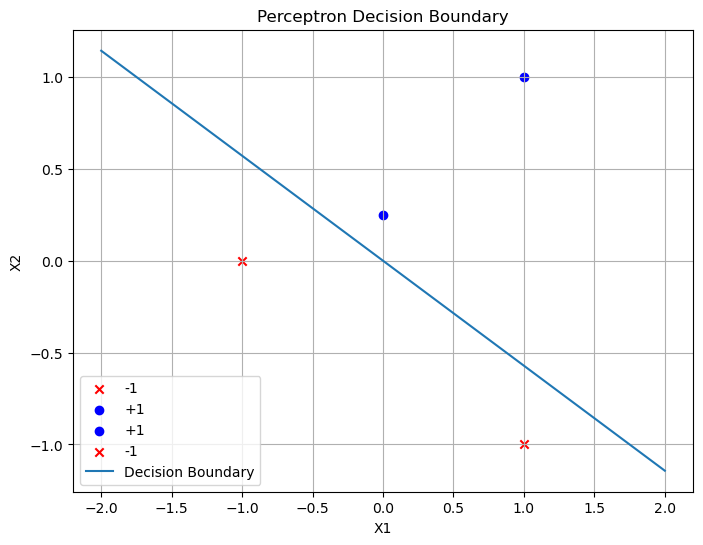

In [4]:
# Plotting the data points and decision boundary
plt.figure(figsize=(8, 6))

# Plot data points
for i, x in enumerate(data_points):
    if solutions[i] == 1 and f1:
        plt.scatter(x[0], x[1], color='blue', marker='o', label='+1')
    else:
        plt.scatter(x[0], x[1], color='red', marker='x', label='-1')

# Plot the decision boundary (line)
x_values = np.linspace(-2, 2, 100)
y_values = -(weights[0] * x_values + weights[2]) / weights[1]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

Para inicializar os pesos com a "standard normal distribution basta usar 
```py
def initialize_weights():
    return np.random.randn(3)
```
Como já vimos anteriormente, vai efetivamente convergir

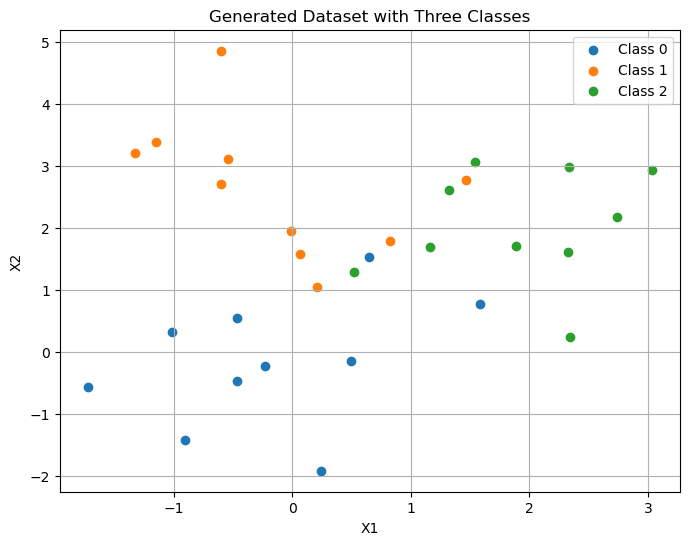

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters for class distributions
means = np.array([[0, 0], [0, 3], [2, 2]])
covariance = np.eye(2)  # Identity matrix as covariance for isotropic Gaussian distribution

# Generate data for three classes
class_0 = np.random.multivariate_normal(means[0], covariance, 10)
class_1 = np.random.multivariate_normal(means[1], covariance, 10)
class_2 = np.random.multivariate_normal(means[2], covariance, 10)

# Combine data for all classes
data = np.concatenate([class_0, class_1, class_2])
labels = np.array([0] * 10 + [1] * 10 + [2] * 10)

# Plotting the data
plt.figure(figsize=(8, 6))

plt.scatter(class_0[:, 0], class_0[:, 1], label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 2')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Dataset with Three Classes')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np


# Add bias term to data
data_with_bias = np.c_[data, np.ones(data.shape[0])]

# Number of classes
num_classes = len(np.unique(labels))

# Initialize weights for each class
weights = np.zeros((num_classes, data_with_bias.shape[1]))

# Multi-class perceptron training
learning_rate = 1
iterations = 100

for _ in range(iterations):
    for i, x in enumerate(data_with_bias):
        scores = np.dot(weights, x)
        predicted_class = np.argmax(scores)
        
        if predicted_class != labels[i]:
            weights[labels[i]] += learning_rate * x
            weights[predicted_class] -= learning_rate * x

# Calculate training accuracy
correct = 0
for i, x in enumerate(data_with_bias):
    scores = np.dot(weights, x)
    predicted_class = np.argmax(scores)
    if predicted_class == labels[i]:
        correct += 1

accuracy = correct / len(data_with_bias)
print(f"Training accuracy: {accuracy * 100:.2f}%")

Training accuracy: 76.67%


# Agora vamos passar para um data set real -> Numeros escritos à mão


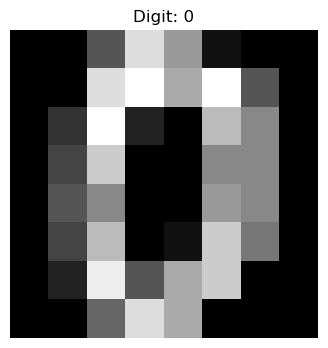

In [16]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Extract the data and labels
data = digits.data
labels = digits.target

# Display an example digit
plt.figure(figsize=(4, 4))
plt.imshow(data[0].reshape(8, 8), cmap='gray')
plt.title(f"Digit: {labels[0]}")
plt.axis('off')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Training data shape: (1437, 64)
Test data shape: (360, 64)


In [18]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Initialize the perceptron classifier
perceptron = Perceptron(random_state=42)

# Train the perceptron on the training data
perceptron.fit(train_data, train_labels)

# Predict on training and test data
train_predictions = perceptron.predict(train_data)
test_predictions = perceptron.predict(test_data)

# Calculate training and test accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training accuracy: 96.59%
Test accuracy: 95.00%


In [21]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False, shuffle=False)
clf.fit(train_data, train_labels)
print(clf.score(train_data, train_labels))
print(clf.score(test_data, test_labels))


0.9638135003479471
0.9472222222222222


# Agora a minha implementação 


In [25]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

# Extract the data and labels
data = digits.data
labels = digits.target

# Split the data into training and test sets (80% training, 20% test)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Add bias term to data
train_data_with_bias = np.c_[train_data, np.ones(train_data.shape[0])]
test_data_with_bias = np.c_[test_data, np.ones(test_data.shape[0])]

# Number of classes
num_classes = len(np.unique(labels))

# Initialize weights for each class
weights = np.zeros((num_classes, train_data_with_bias.shape[1]))

# Multi-class perceptron training
learning_rate = 0.1
iterations = 1000

for _ in range(iterations):
    for i, x in enumerate(train_data_with_bias):
        scores = np.dot(weights, x)
        predicted_class = np.argmax(scores)
        
        if predicted_class != train_labels[i]:
            weights[train_labels[i]] += learning_rate * x
            weights[predicted_class] -= learning_rate * x

# Calculate training accuracy
correct_train = 0
for i, x in enumerate(train_data_with_bias):
    scores = np.dot(weights, x)
    predicted_class = np.argmax(scores)
    if predicted_class == train_labels[i]:
        correct_train += 1

train_accuracy = correct_train / len(train_data_with_bias)

# Calculate test accuracy
correct_test = 0
for i, x in enumerate(test_data_with_bias):
    scores = np.dot(weights, x)
    predicted_class = np.argmax(scores)
    if predicted_class == test_labels[i]:
        correct_test += 1

test_accuracy = correct_test / len(test_data_with_bias)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training accuracy: 100.00%
Test accuracy: 96.11%
